In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import seaborn as sns
import warnings
import datetime as dt
from sklearn.metrics import confusion_matrix
import matplotlib.dates as mdates
from pandas.tseries.offsets import DateOffset
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')

# Load Generation Data (Plant 1)

In [2]:
gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
gen_1=pd.read_csv('Plant_1_Generation_Data.csv')
gen_1.head()
sens_1= pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
sens_1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [3]:
gen_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [4]:
weather_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [5]:
gen_1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [6]:
gen_1.tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0

In [7]:
gen_1.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

In [8]:
gen_data.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

In [9]:
weather_data.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

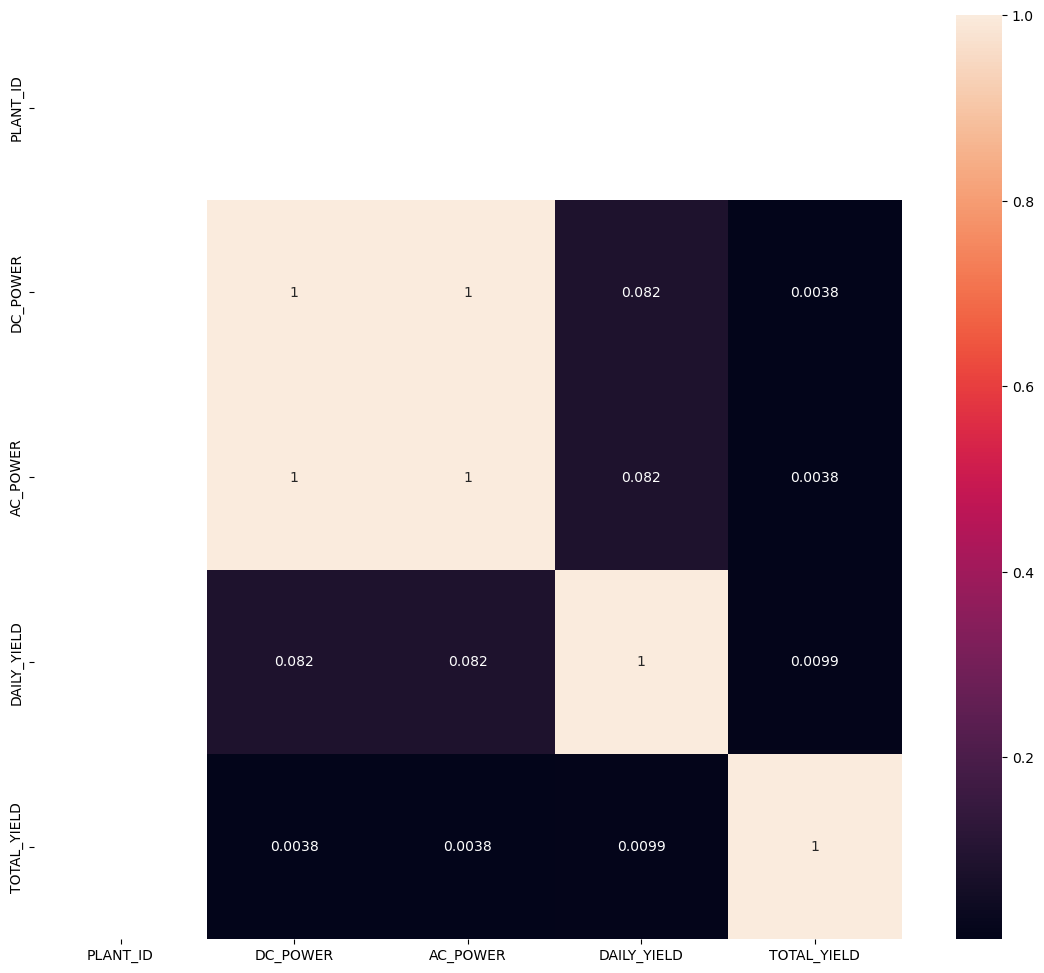

In [10]:
# Filter out non-numeric columns
numeric_data = gen_1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numeric data
corelation = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corelation, annot=True)
plt.show()

In [11]:
sens_1.tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
3177  2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe            22.150570   
3178  2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe            22.129816   
3179  2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe            22.008275   
3180  2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe            21.969495   
3181  2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe            21.909288   

      MODULE_TEMPERATURE  IRRADIATION  
3177           21.480377          0.0  
3178           21.389024          0.0  
3179           20.709211          0.0  
3180           20.734963          0.0  
3181           20.427972          0.0

In [12]:
sens_1.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

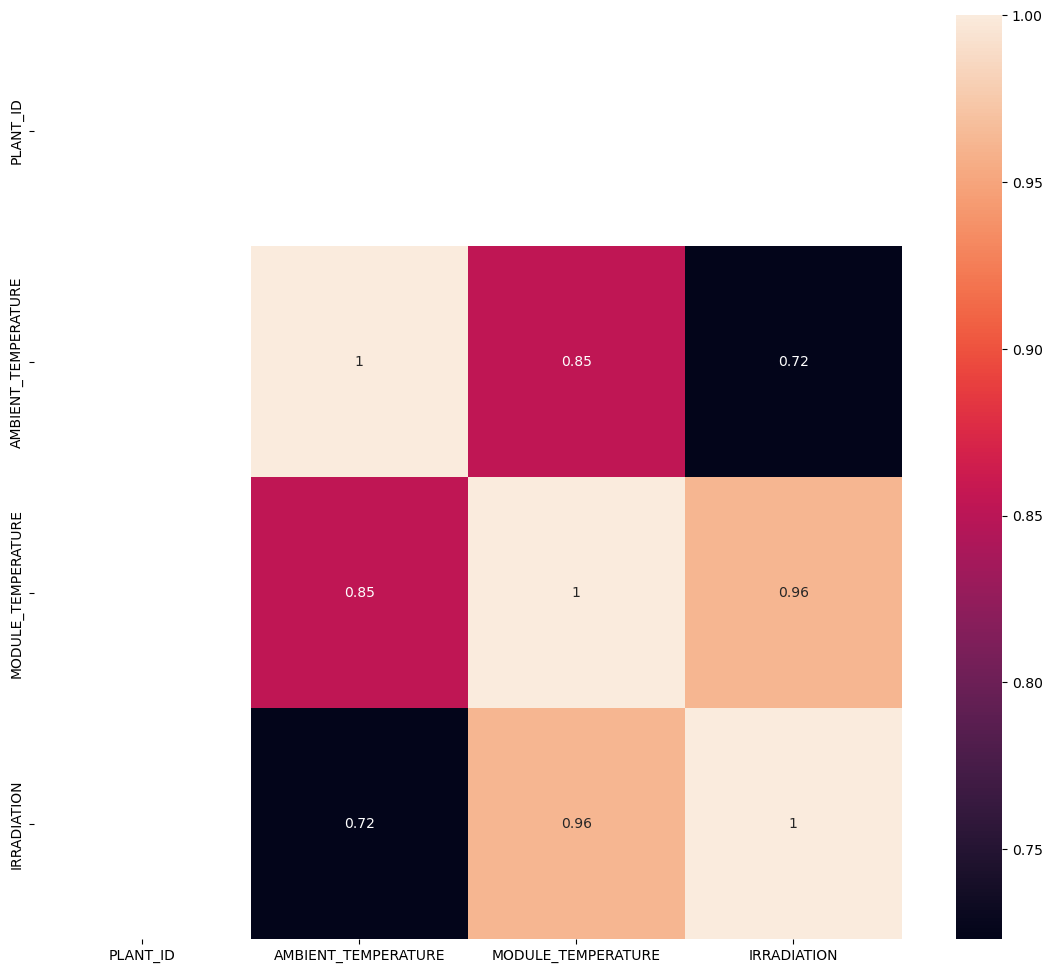

In [13]:
# Filter out non-numeric columns
numeric_data = sens_1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numeric data
corelation = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corelation, annot=True)
plt.show()

# Format 'DATE_TIME' column to datetime

In [14]:
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [15]:
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

# Daily Yield & AC/DC Power from Generation Data

In [16]:
gen_data_daily = gen_data.set_index('DATE_TIME').resample('D').sum().reset_index()

# Plot Daily Yield and AC/DC Power

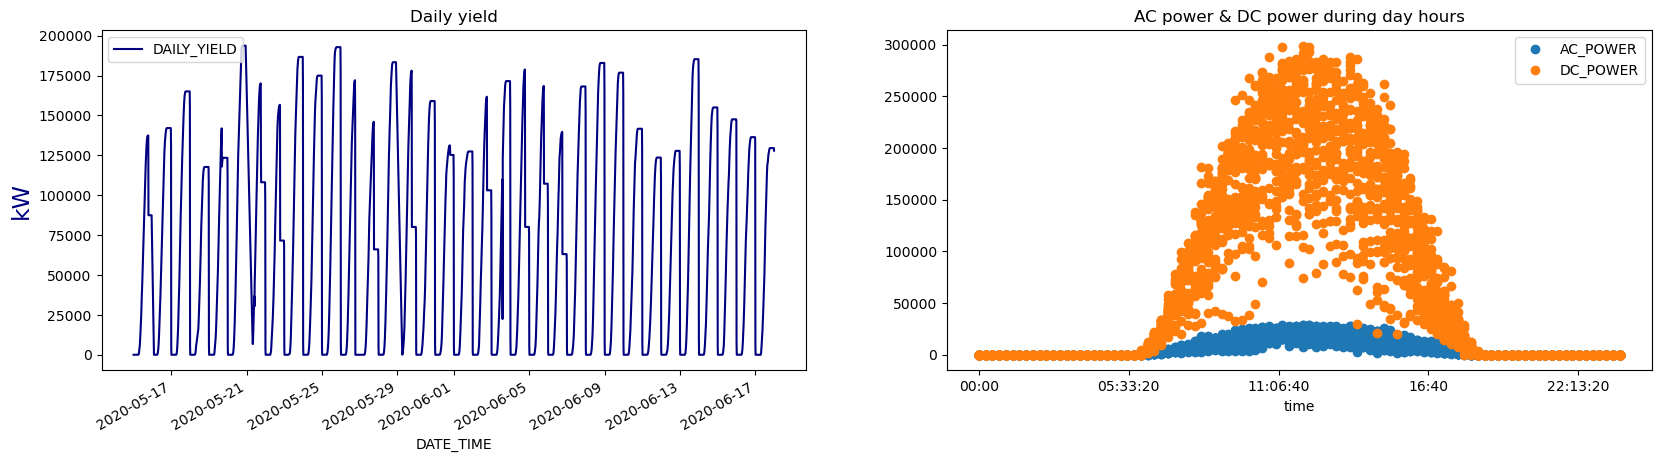

In [17]:
df_gen = gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time'] = df_gen['DATE_TIME'].dt.time

fig, ax = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(20, 5))
# daily yield plot
df_gen.plot(x='DATE_TIME', y='DAILY_YIELD', color='navy', ax=ax[0])

# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME', axis=1)[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[1])

ax[0].set_title('Daily yield')
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('kW', color='navy', fontsize=17)
plt.show()

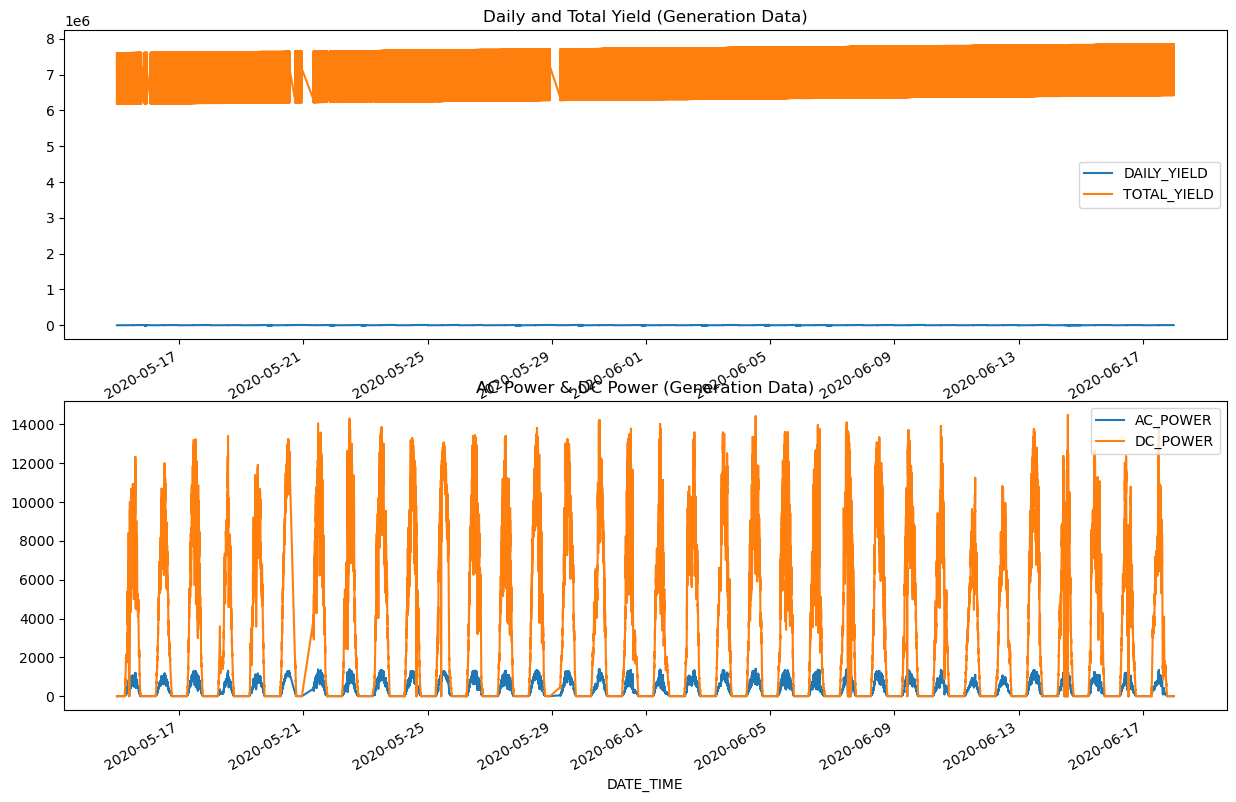

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
gen_data.plot(x='DATE_TIME', y=['DAILY_YIELD', 'TOTAL_YIELD'], ax=ax[0], title="Daily and Total Yield (Generation Data)")
gen_data.plot(x='DATE_TIME', y=['AC_POWER', 'DC_POWER'], ax=ax[1], title="AC Power & DC Power (Generation Data)")
plt.show()

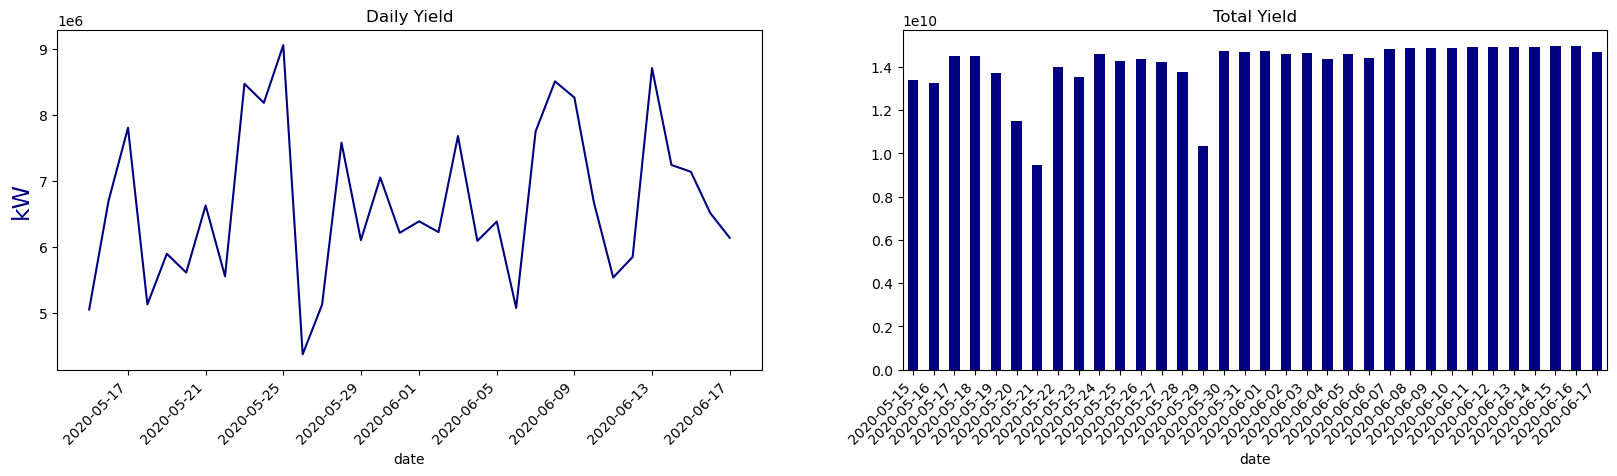

In [19]:
# Create a copy and extract the date
daily_gen = df_gen.copy()
daily_gen['date'] = daily_gen['DATE_TIME'].dt.date

# Group by 'date' and sum only the numerical columns
daily_gen = daily_gen.groupby('date').sum(numeric_only=True)

# Plot the daily and total yield
fig, ax = plt.subplots(ncols=2, dpi=100, figsize=(20, 5))
daily_gen['DAILY_YIELD'].plot(ax=ax[0], color='navy')
daily_gen['TOTAL_YIELD'].plot(kind='bar', ax=ax[1], color='navy')

fig.autofmt_xdate(rotation=45)
ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kW', color='navy', fontsize=17)
plt.show()

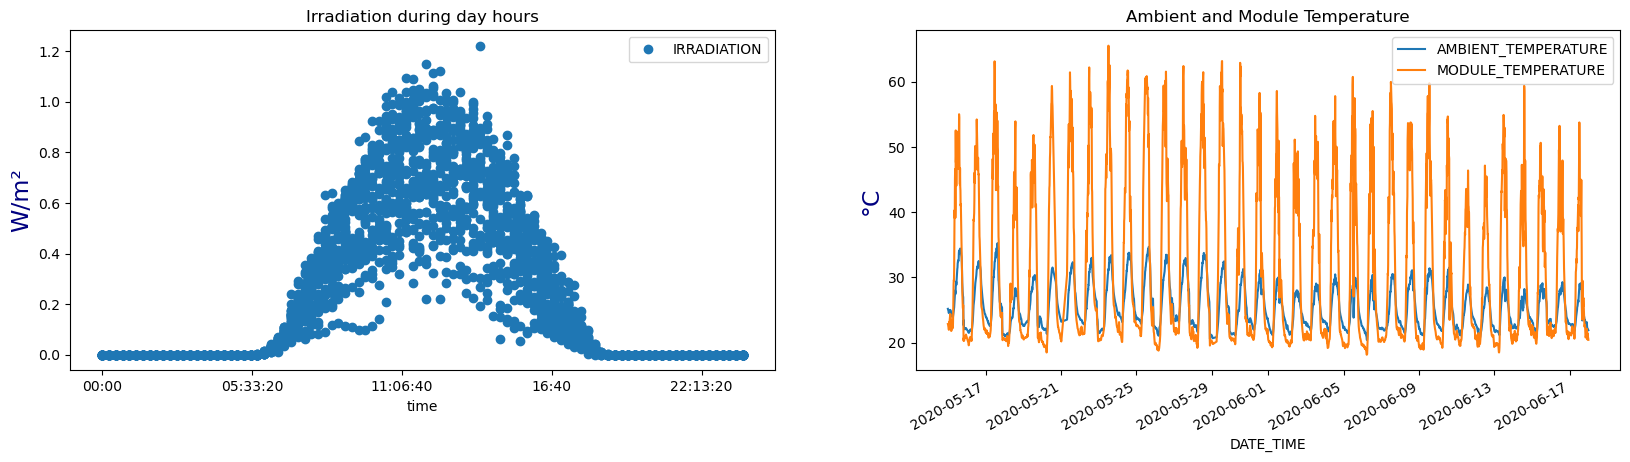

In [20]:
# Group by 'DATE_TIME' and sum
df_sens = sens_1.groupby('DATE_TIME').sum().reset_index()
df_sens['time'] = df_sens['DATE_TIME'].dt.time

# Plotting
fig, ax = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(20, 5))

# Irradiation plot
df_sens.plot(x='time', y='IRRADIATION', ax=ax[0], style='o')

# Ambient and Module Temperature plot
df_sens.set_index('DATE_TIME').drop('time', axis=1)[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].plot(ax=ax[1])

# Setting titles and labels
ax[0].set_title('Irradiation during day hours')
ax[1].set_title('Ambient and Module Temperature')
ax[0].set_ylabel('W/m²', color='navy', fontsize=17)
ax[1].set_ylabel('°C', color='navy', fontsize=17)

plt.show()

# % of DC power converted to AC power

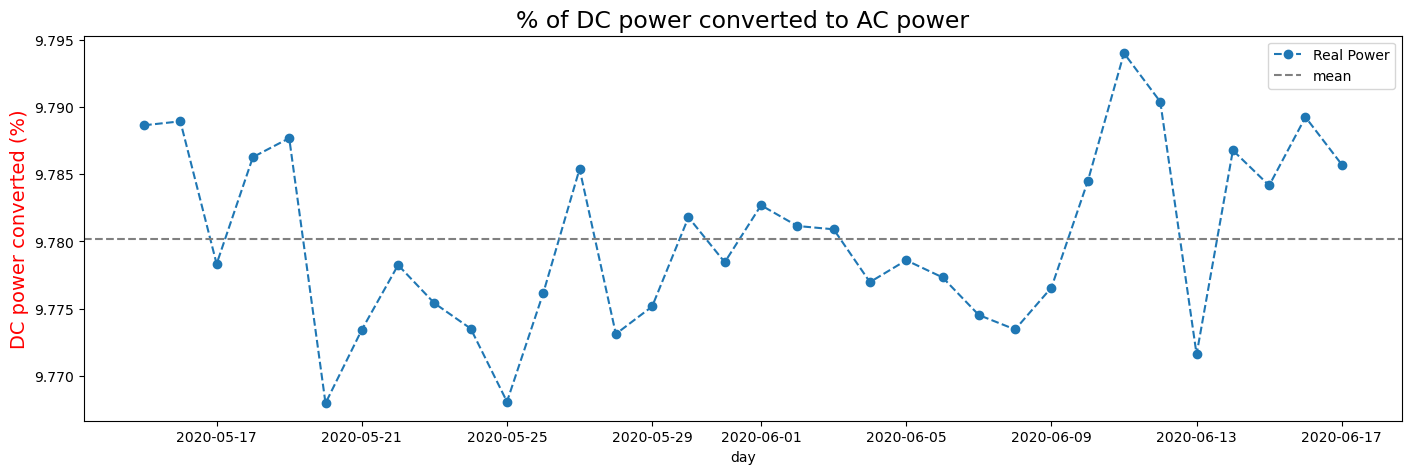

In [21]:
# Create a copy of the data
loss = gen_1.copy()

# Create a new 'day' column containing only the date part from 'DATE_TIME'
loss['day'] = loss['DATE_TIME'].dt.date

# Drop the 'DATE_TIME' column to prevent summing over datetime values
loss = loss.drop(columns=['DATE_TIME'])

# Group by 'day' and sum only numeric columns
loss = loss.groupby('day').sum()

# Calculate the percentage of DC power converted to AC power
loss['losses'] = (loss['AC_POWER'] / loss['DC_POWER']) * 100

# Plot the losses
loss['losses'].plot(style='o--', figsize=(17, 5), label='Real Power')

# Plot styling
plt.title('% of DC power converted to AC power', size=17)
plt.ylabel('DC power converted (%)', fontsize=14, color='red')
plt.axhline(loss['losses'].mean(), linestyle='--', color='gray', label='mean')
plt.legend()
plt.show()

# DC Power

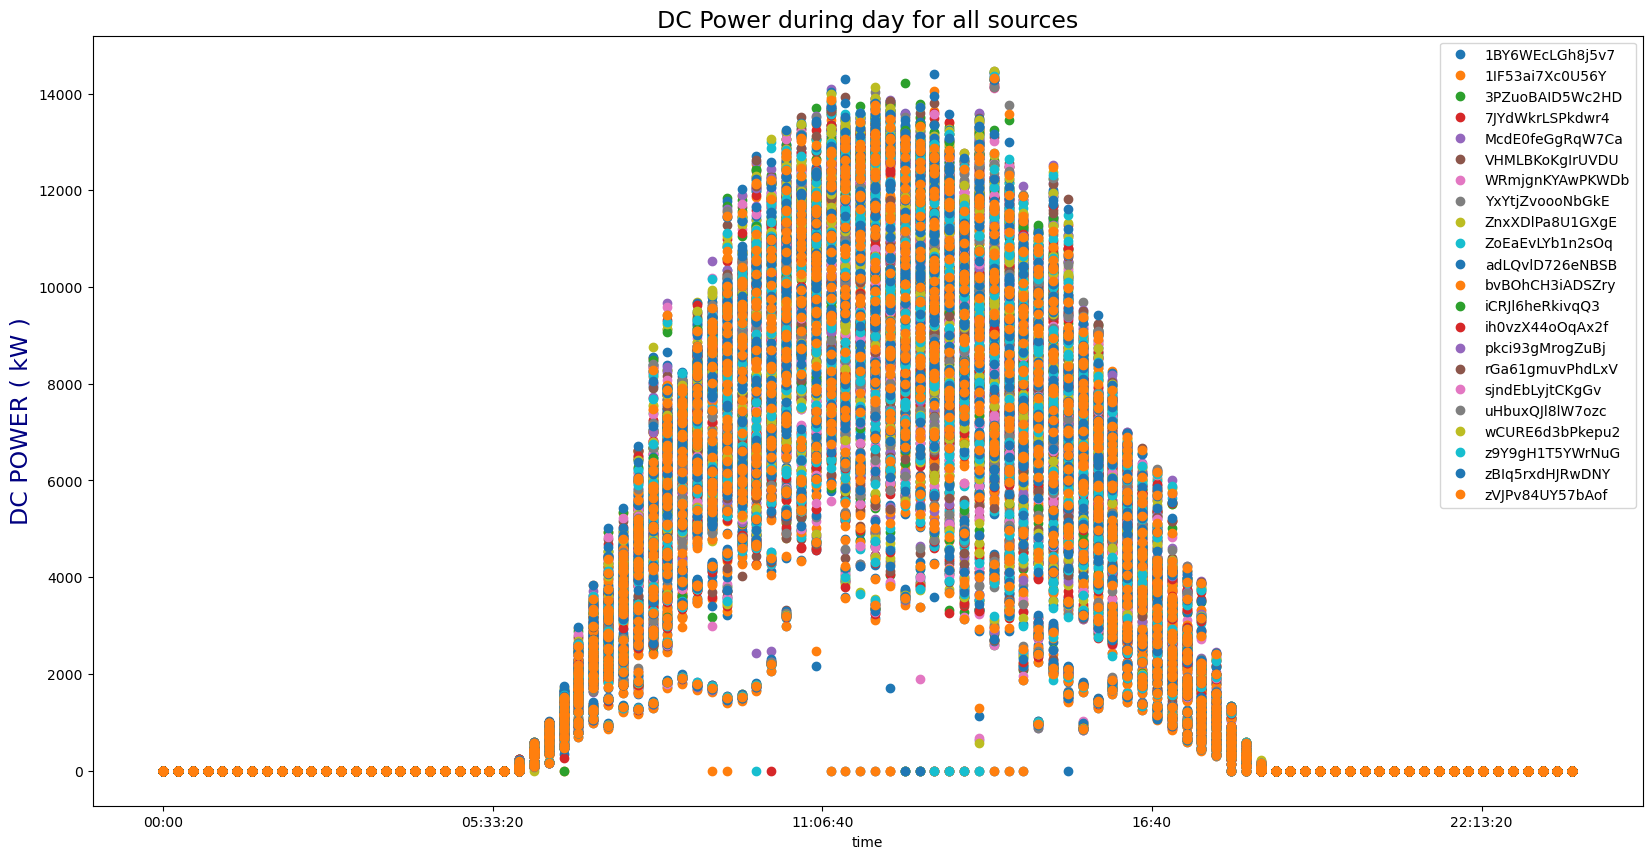

In [22]:
sources=gen_1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power during day for all sources',size=17)
plt.ylabel('DC POWER ( kW )',color='navy',fontsize=17)
plt.show()

# DC POWER ( kW )

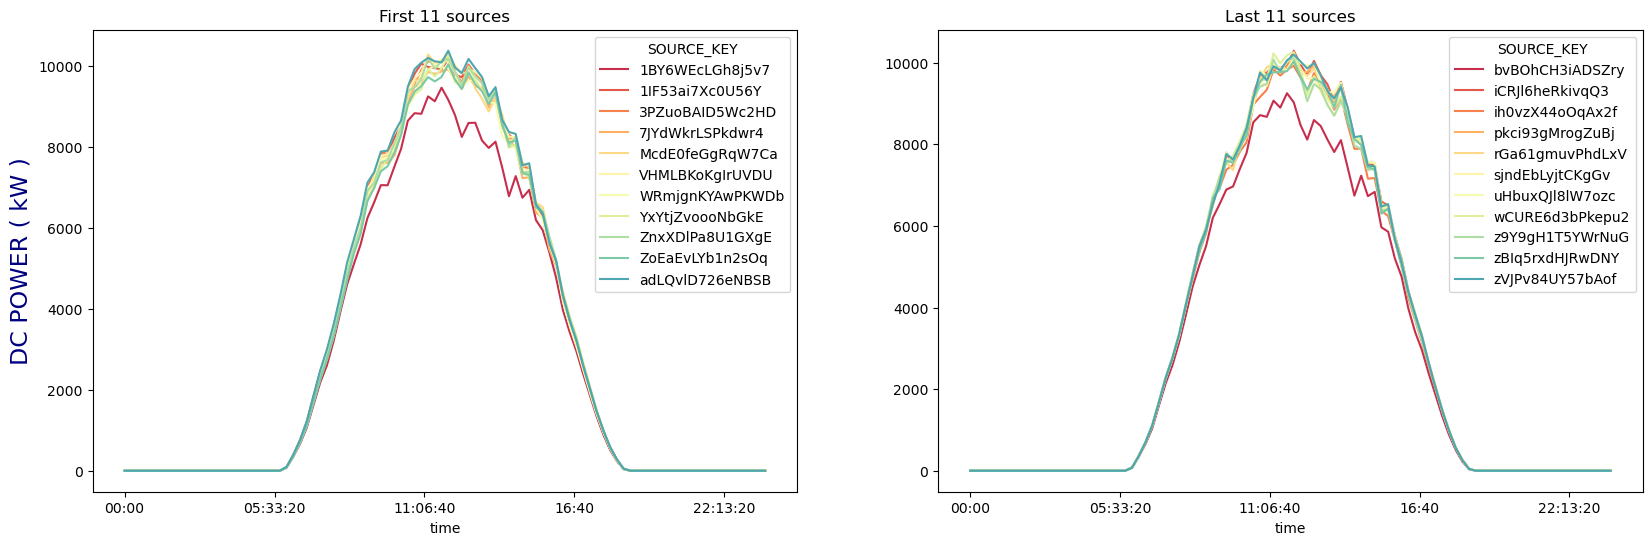

In [23]:
dc_gen=gen_1.copy()
dc_gen['time']=dc_gen['DATE_TIME'].dt.time
dc_gen=dc_gen.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()

cmap = sns.color_palette("Spectral", n_colors=12)

fig,ax=plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,6))
dc_gen.iloc[:,0:11].plot(ax=ax[0],color=cmap)
dc_gen.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
plt.show()

# Irradiation, Ambient and Module Temperature from Weather Data

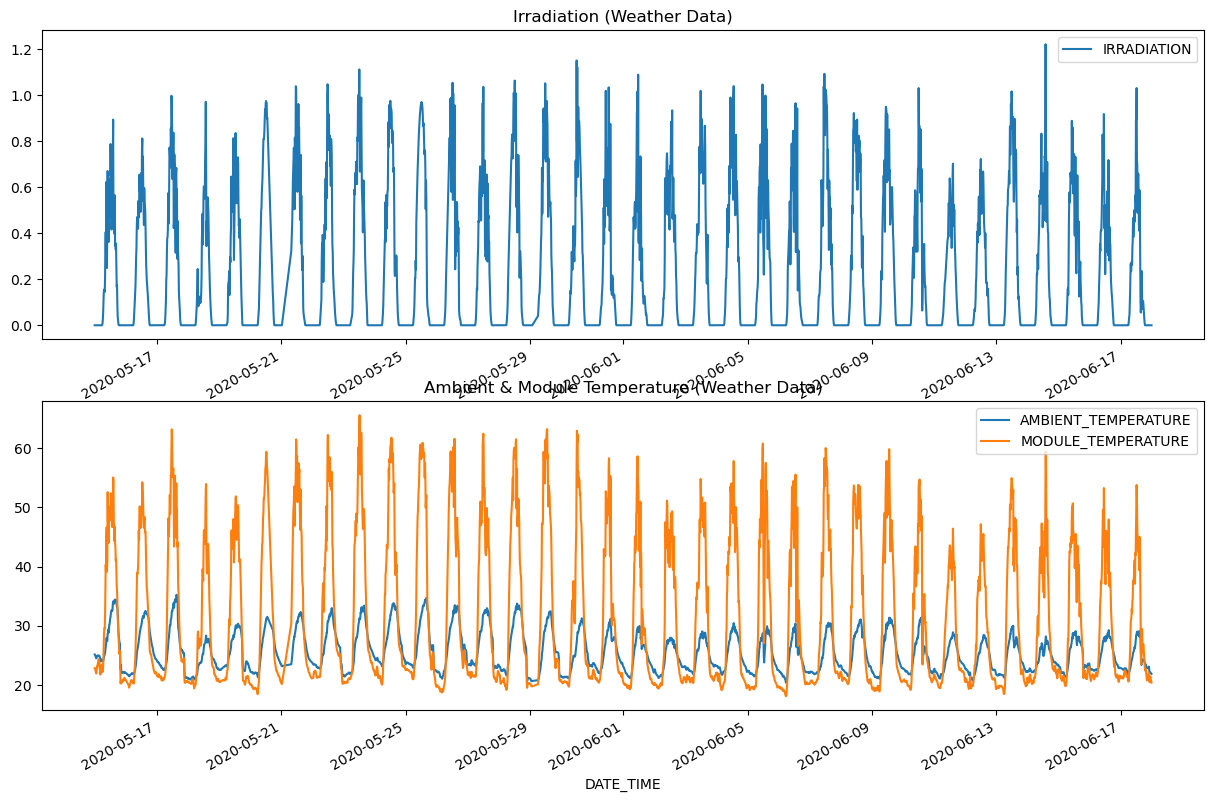

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
weather_data.plot(x='DATE_TIME', y='IRRADIATION', ax=ax[0], title="Irradiation (Weather Data)")
weather_data.plot(x='DATE_TIME', y=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'], ax=ax[1], title="Ambient & Module Temperature (Weather Data)")
plt.show()

# Real DC power converted (DC Power efficiency)

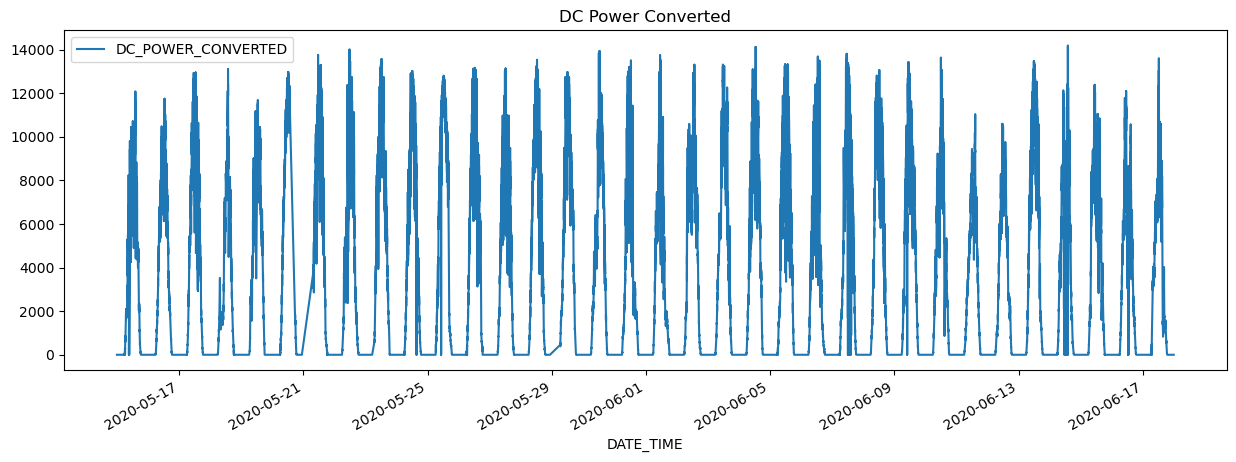

In [25]:
gen_data['DC_POWER_CONVERTED'] = gen_data['DC_POWER'] * 0.98  # Assume 2% loss in conversion
fig, ax = plt.subplots(figsize=(15, 5))
gen_data.plot(x='DATE_TIME', y='DC_POWER_CONVERTED', ax=ax, title="DC Power Converted")
plt.show()

# DC Power generated during day hours (Generation Data)

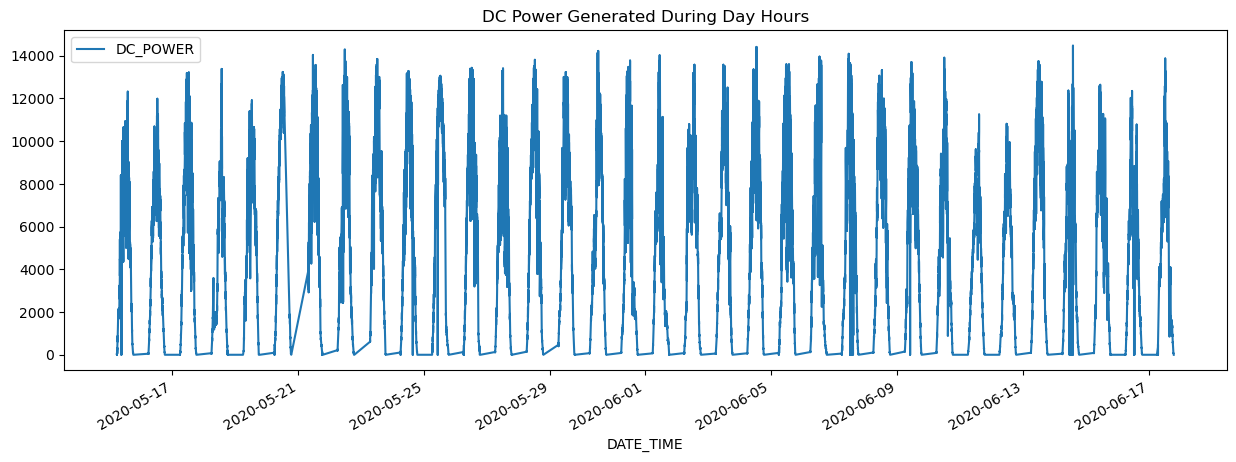

In [26]:
day_data_gen = gen_data[(gen_data['DATE_TIME'].dt.hour >= 6) & (gen_data['DATE_TIME'].dt.hour <= 18)]
fig, ax = plt.subplots(figsize=(15, 5))
day_data_gen.plot(x='DATE_TIME', y='DC_POWER', ax=ax, title="DC Power Generated During Day Hours")
plt.show()

# DC Power And Daily Yield

In [27]:
temp1_gen=gen_1.copy()

temp1_gen['time']=temp1_gen['DATE_TIME'].dt.time
temp1_gen['day']=temp1_gen['DATE_TIME'].dt.date


temp1_sens=sens_1.copy()

temp1_sens['time']=temp1_sens['DATE_TIME'].dt.time
temp1_sens['day']=temp1_sens['DATE_TIME'].dt.date

# just for columns
cols=temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack()

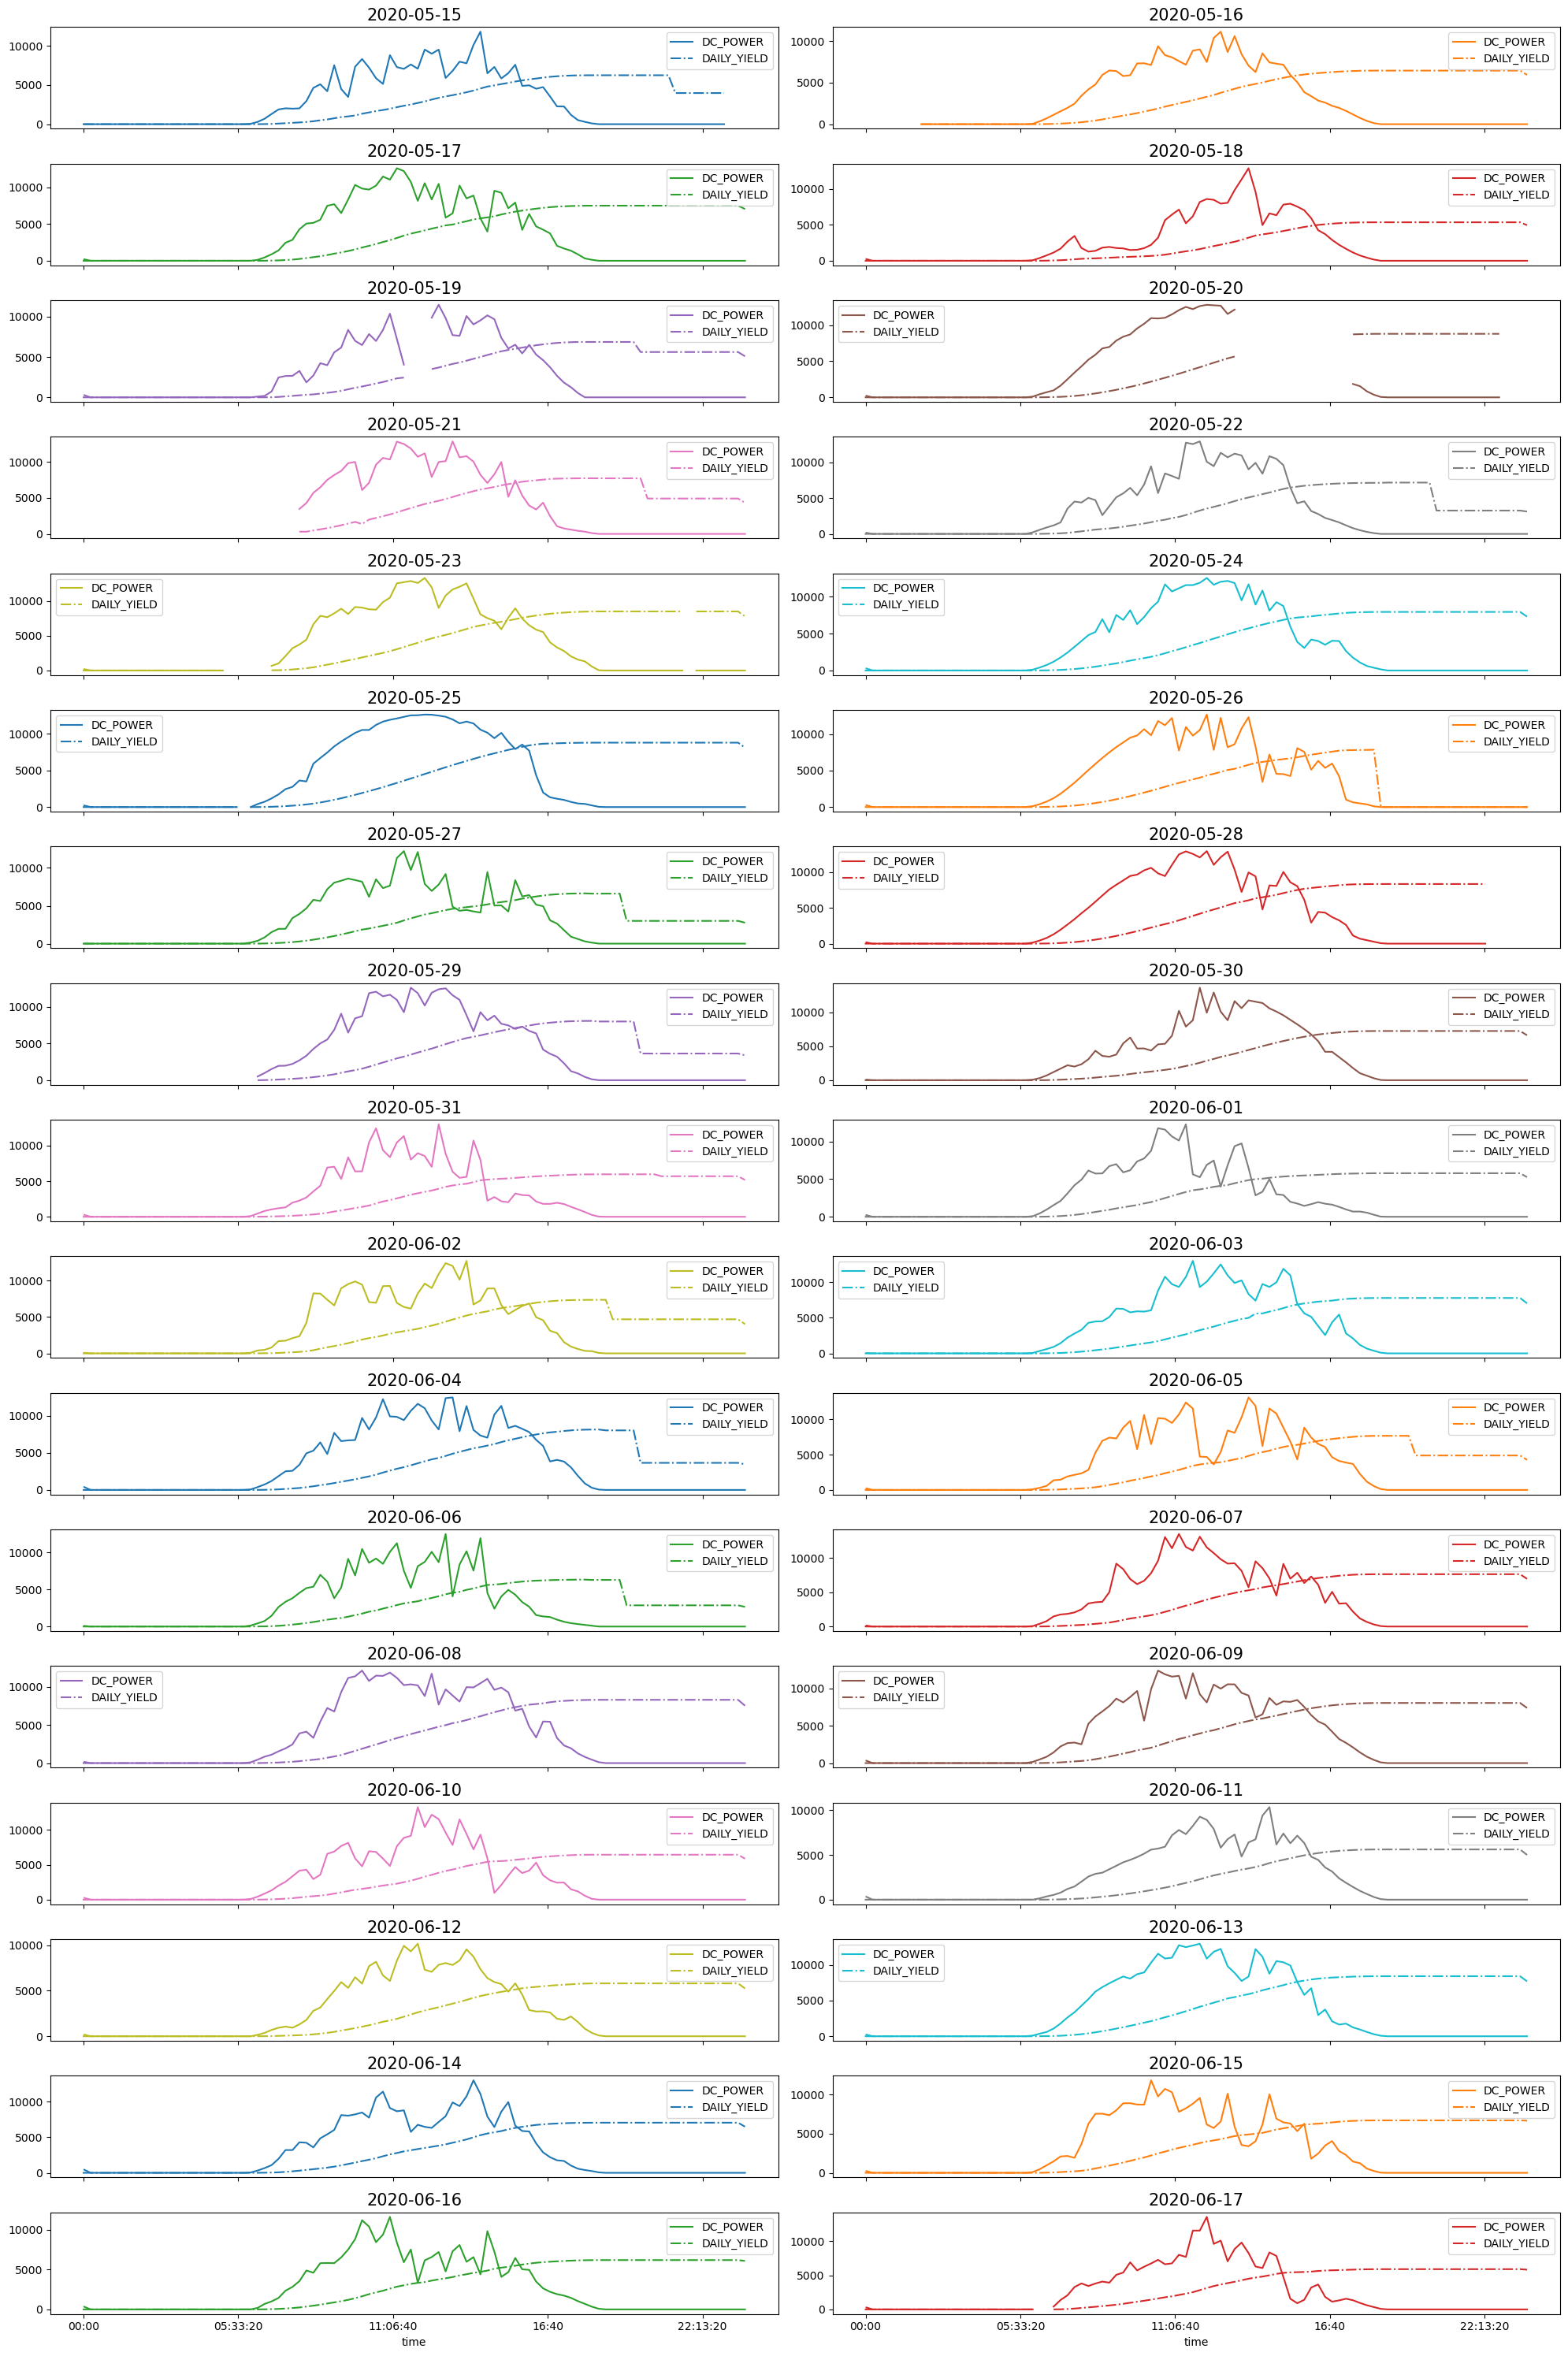

In [28]:
ax =temp1_gen.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
temp1_gen.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

# Module Temperature And Ambient Temperature

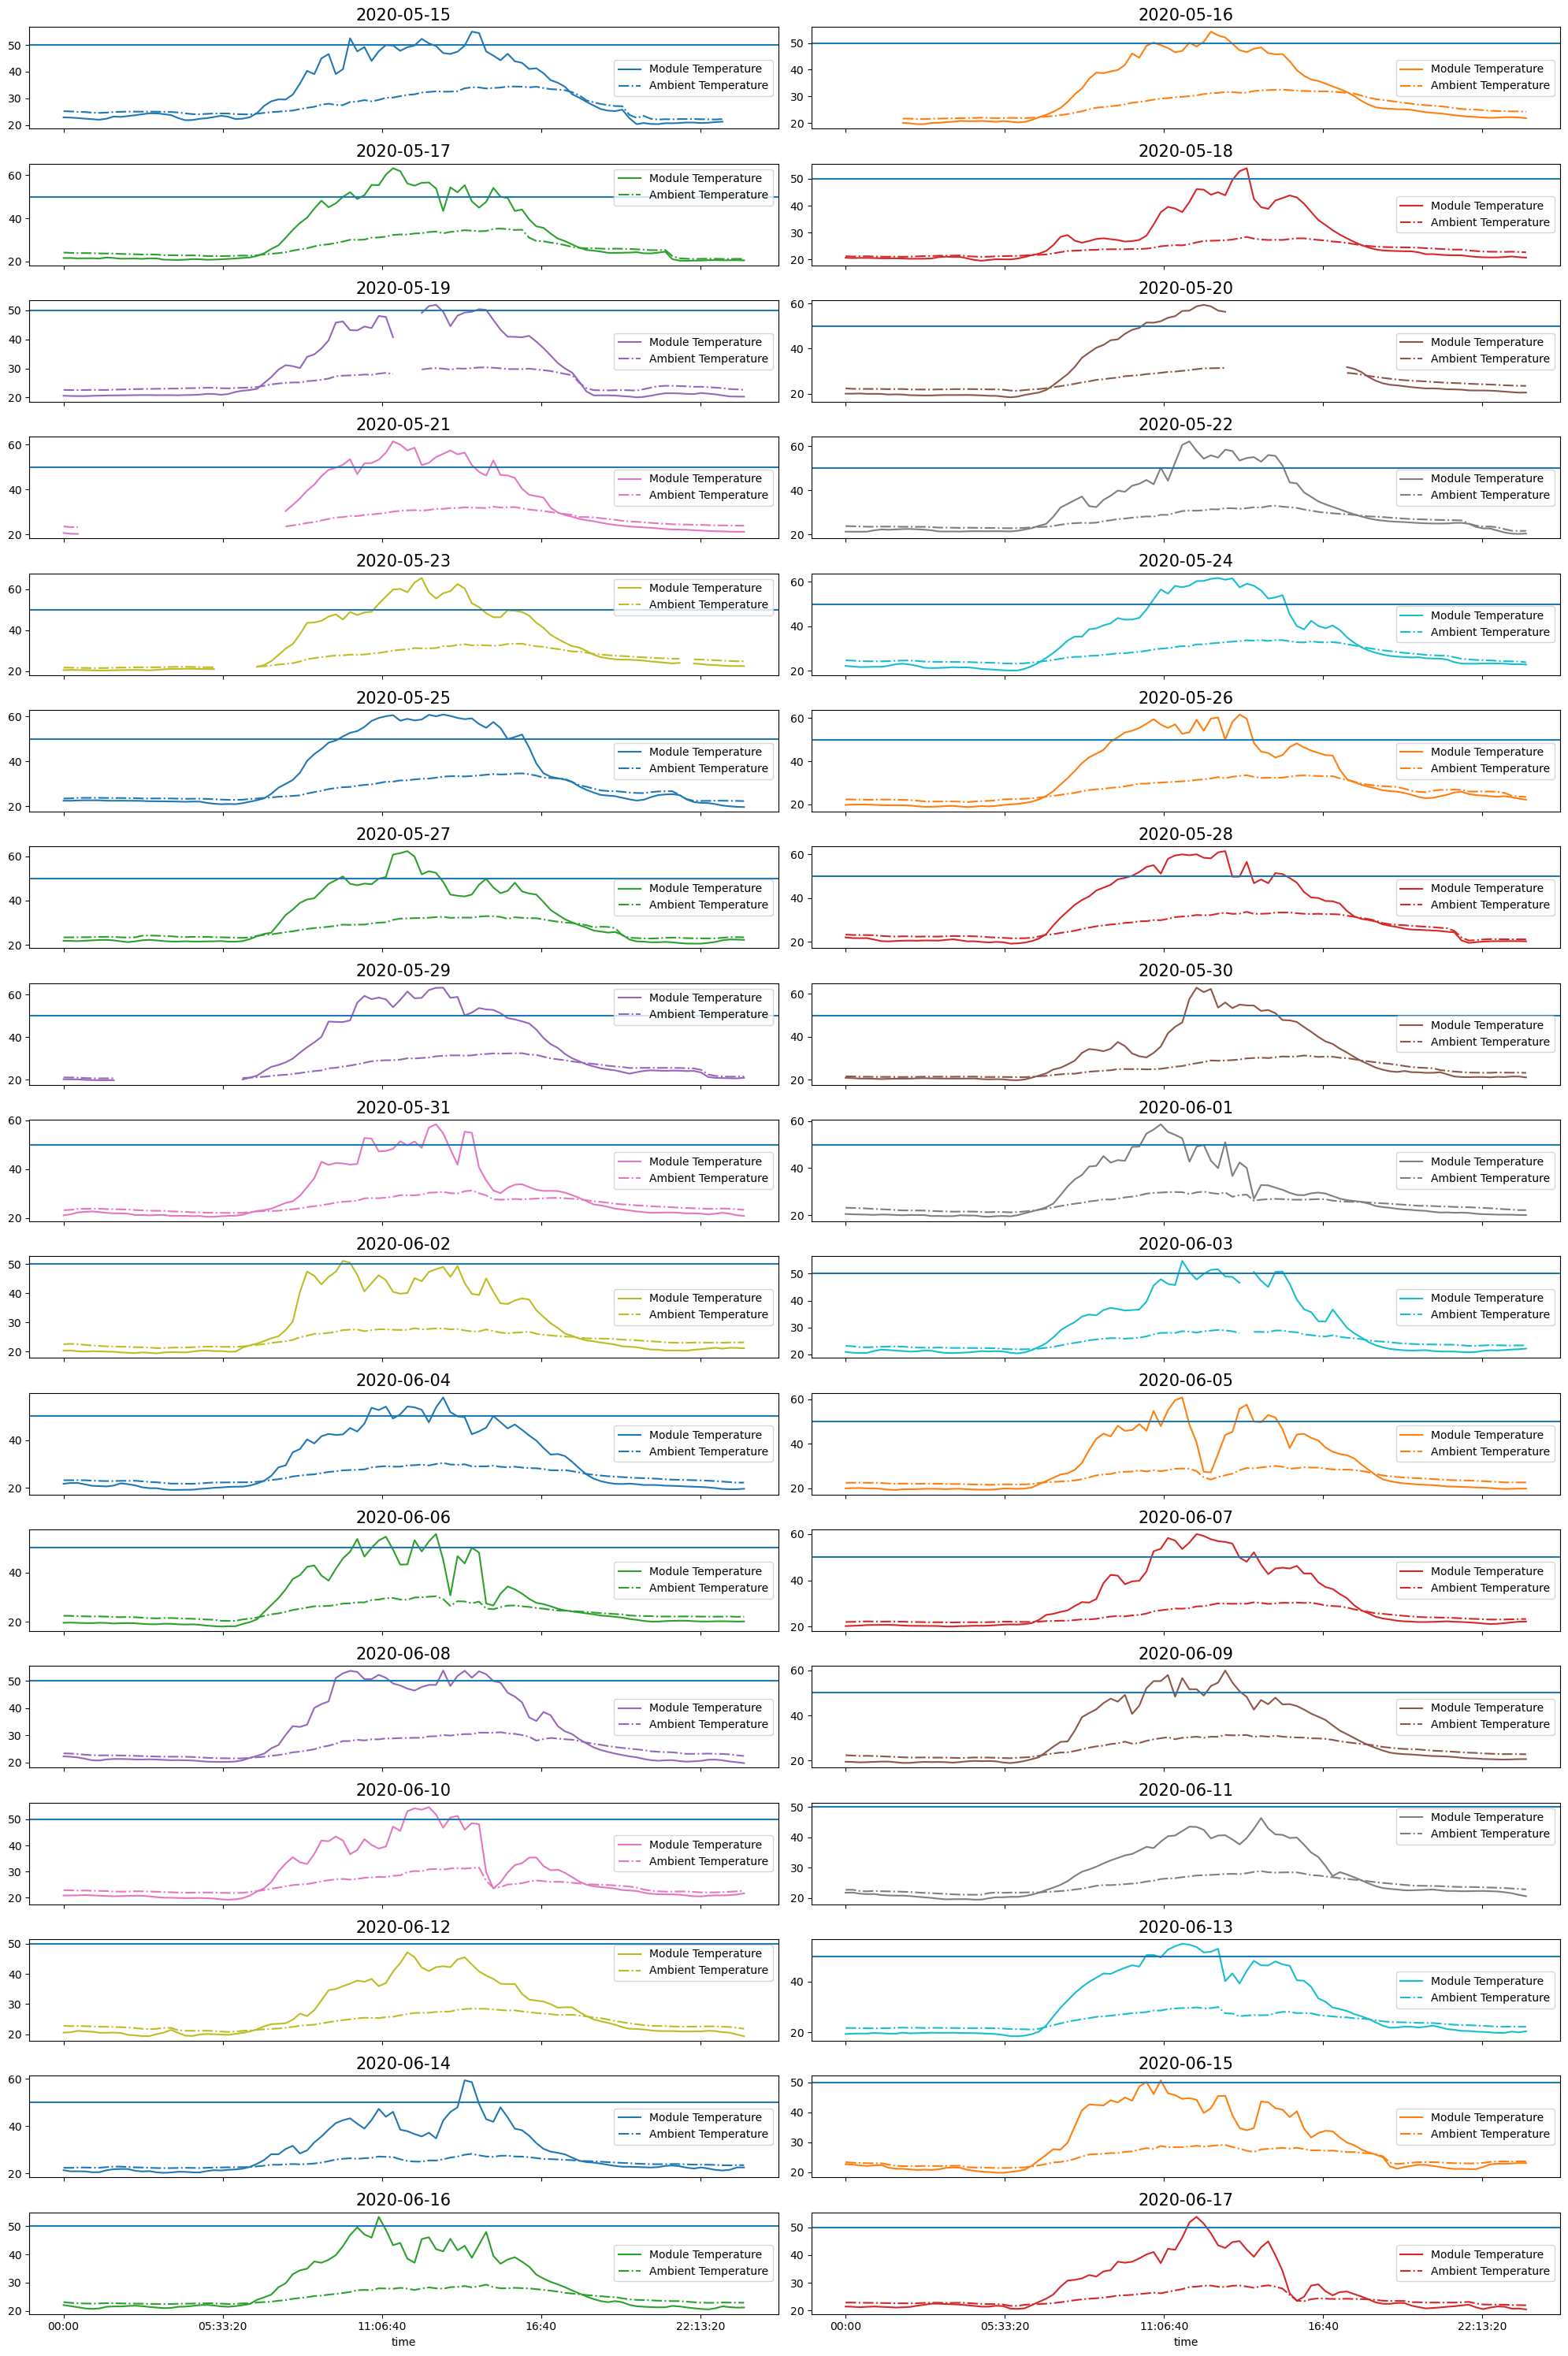

In [29]:
ax= temp1_sens.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
temp1_sens.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

# DC_POWER And DAILY_YIELD

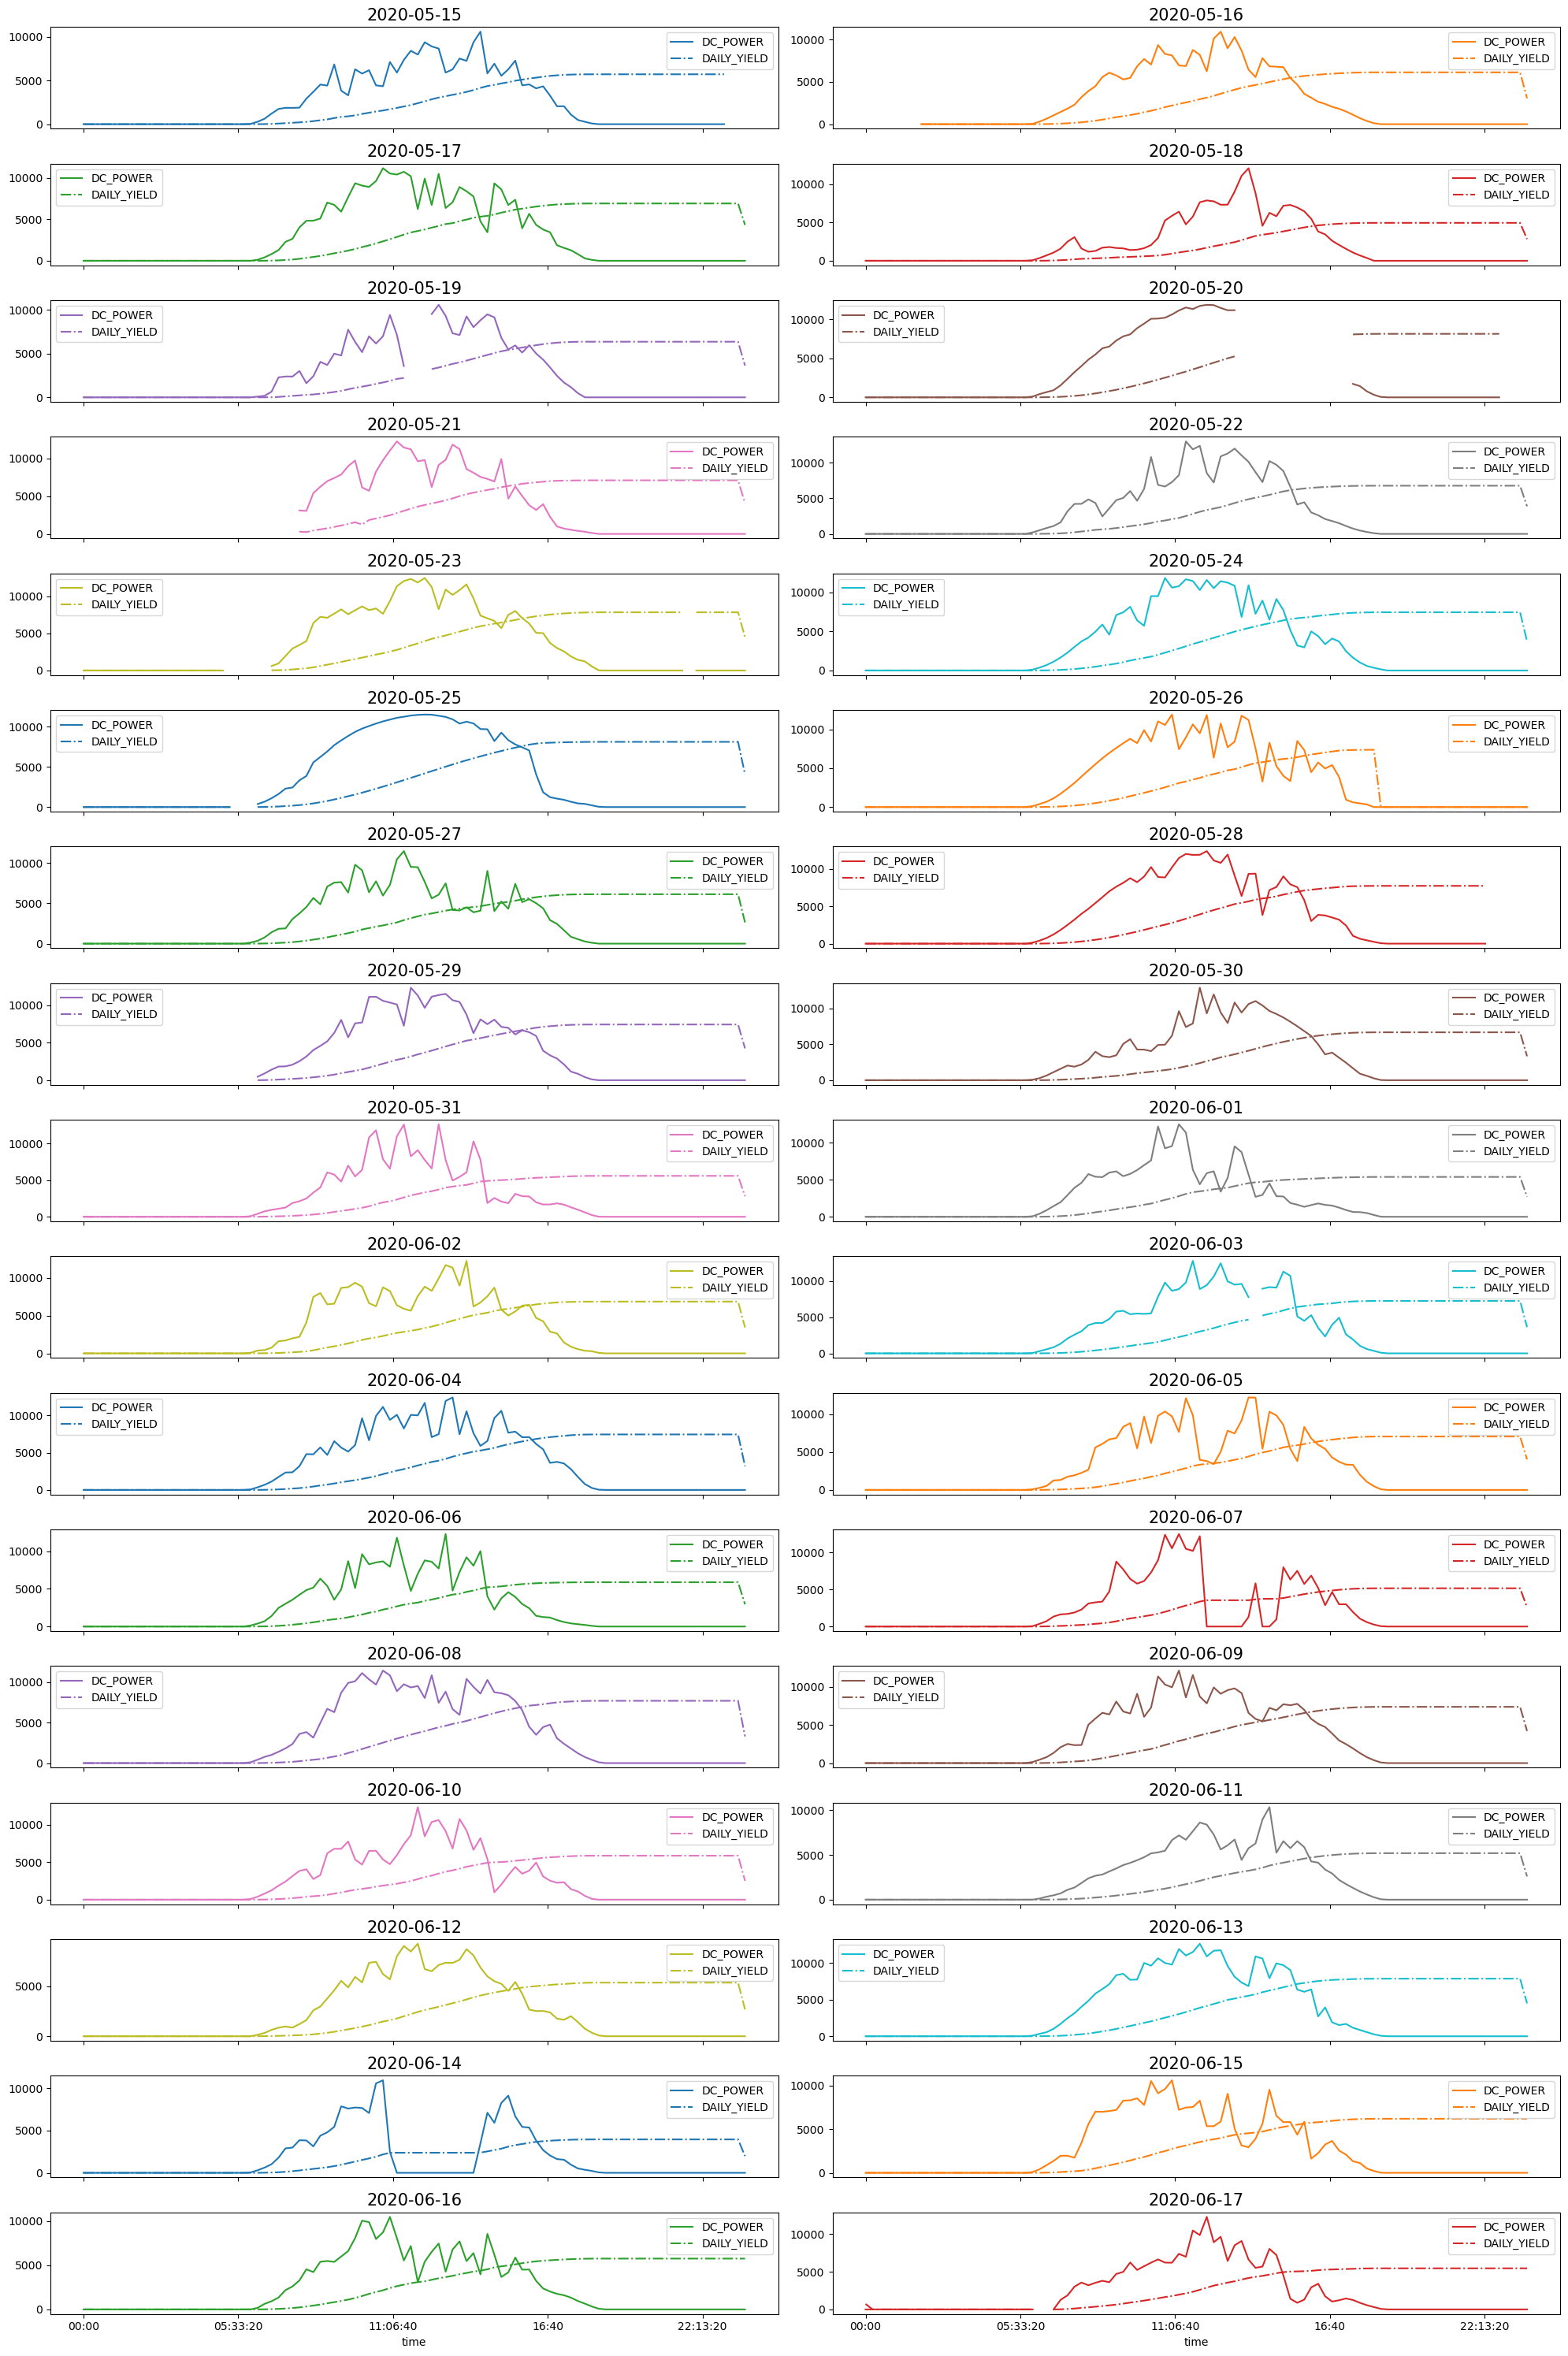

In [30]:
worst_source=gen_1[gen_1['SOURCE_KEY']=='bvBOhCH3iADSZry']
worst_source['time']=worst_source['DATE_TIME'].dt.time
worst_source['day']=worst_source['DATE_TIME'].dt.date

ax=worst_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
worst_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30),ax=ax,style='-.')

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

# Inverter Analysis (Generation Data)

In [31]:
inverter_performance = gen_data.groupby('SOURCE_KEY')['DC_POWER'].mean().sort_values()
print(f"Underperforming inverter: {inverter_performance.idxmin()}")

Underperforming inverter: bvBOhCH3iADSZry


# Module temperature and Ambient Temperature on PLANT_1 (Weather Data)

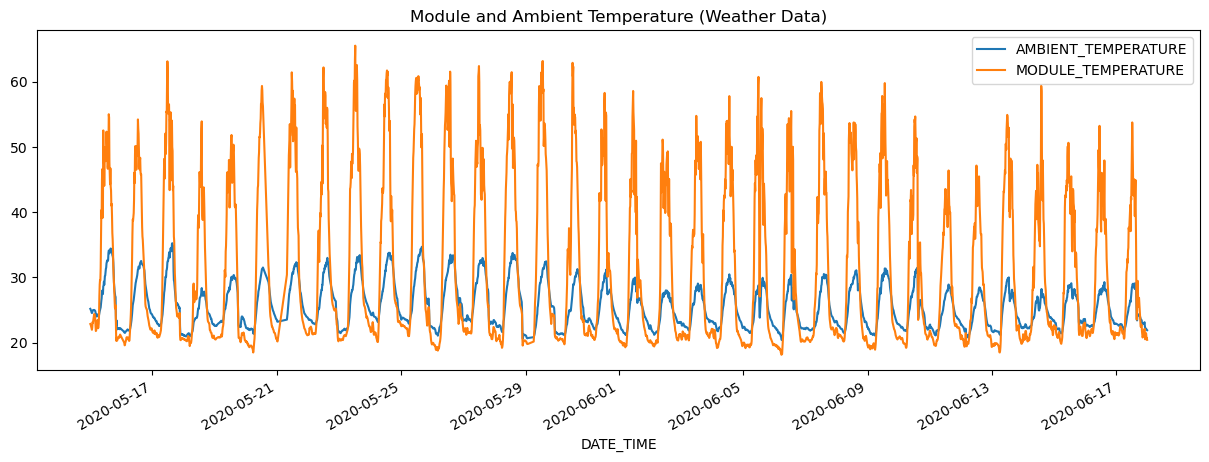

In [32]:
fig, ax = plt.subplots(figsize=(15, 5))
weather_data.plot(x='DATE_TIME', y=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'], ax=ax, title="Module and Ambient Temperature (Weather Data)")
plt.show()

# Inverter in action (Generation Data)

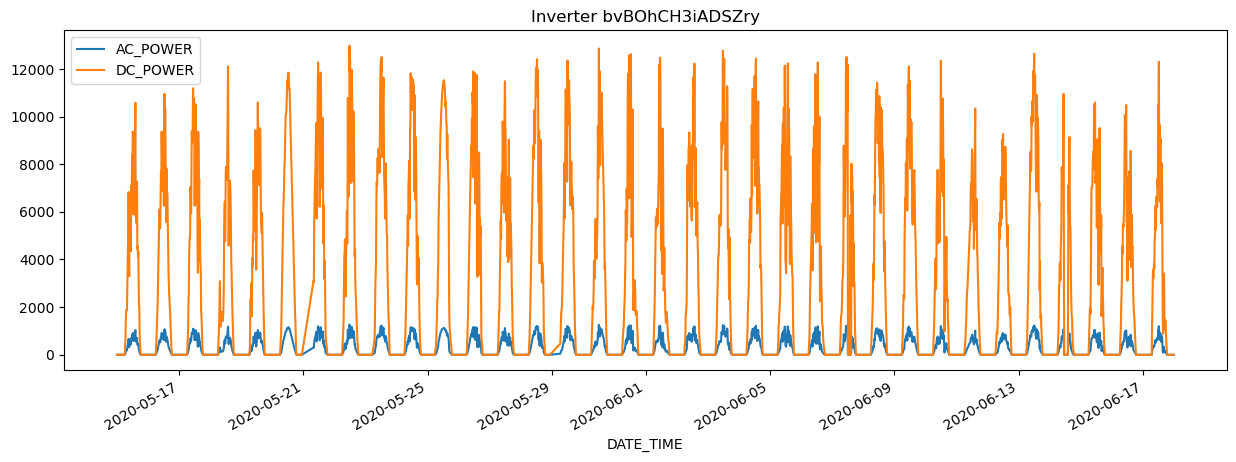

In [33]:
inverter_data = gen_data[gen_data['SOURCE_KEY'] == 'bvBOhCH3iADSZry']
fig, ax = plt.subplots(figsize=(15, 5))
inverter_data.plot(x='DATE_TIME', y=['AC_POWER', 'DC_POWER'], ax=ax, title="Inverter bvBOhCH3iADSZry")
plt.show()

# Forecasting with ARIMA (Generation Data)

In [34]:
df_daily_gen = gen_data_daily[['DATE_TIME', 'DAILY_YIELD']].set_index('DATE_TIME')

# Testing for stationarity

In [35]:
result = adfuller(df_daily_gen['DAILY_YIELD'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.753753588920745
p-value: 6.661765948296561e-05


# Splitting the dataset

In [36]:
train_gen, test_gen = train_test_split(df_daily_gen, test_size=0.2, shuffle=False)

# ARIMA model

In [37]:
arima_model_gen = ARIMA(train_gen['DAILY_YIELD'], order=(5, 1, 0))
arima_fit_gen = arima_model_gen.fit()
forecast_arima_gen = arima_fit_gen.forecast(steps=len(test_gen))
test_gen['Forecast_ARIMA'] = forecast_arima_gen

# Plot ARIMA Forecast

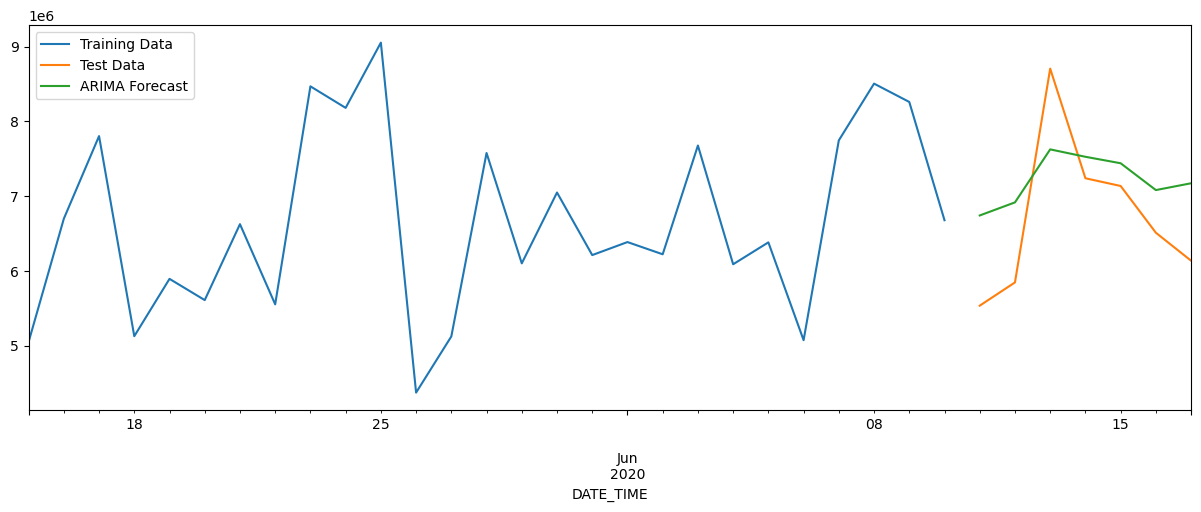

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))
train_gen['DAILY_YIELD'].plot(ax=ax, label='Training Data')
test_gen['DAILY_YIELD'].plot(ax=ax, label='Test Data')
test_gen['Forecast_ARIMA'].plot(ax=ax, label='ARIMA Forecast')
plt.legend()
plt.show()

# SARIMA Model for Seasonal Data 

In [39]:
sarima_model = SARIMAX(train_gen['DAILY_YIELD'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test_gen))
test_gen['Forecast_SARIMA'] = sarima_forecast

# Plot SARIMA Forecast

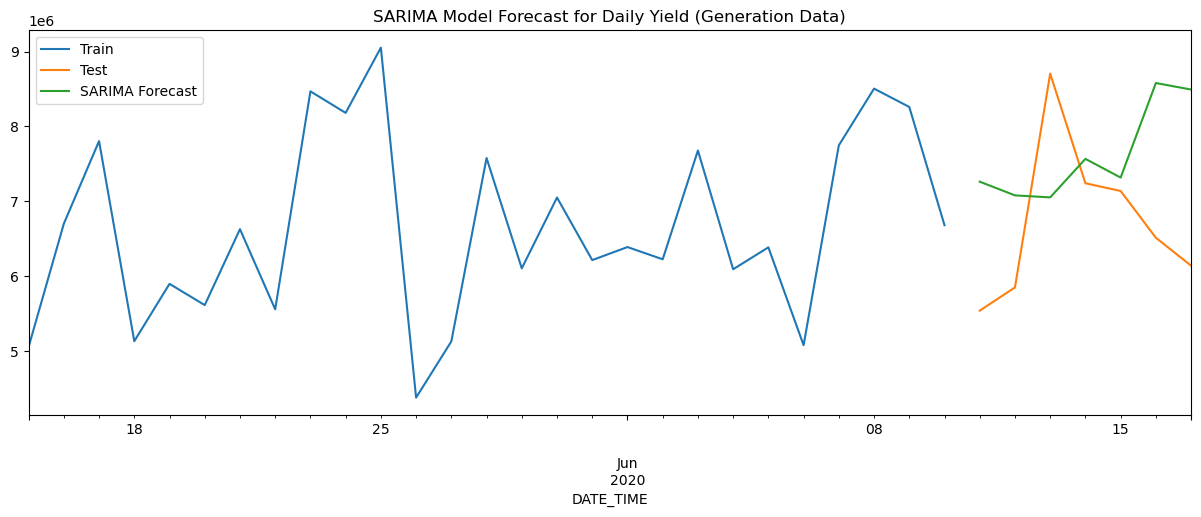

In [40]:
plt.figure(figsize=(15, 5))
train_gen['DAILY_YIELD'].plot(label='Train')
test_gen['DAILY_YIELD'].plot(label='Test')
test_gen['Forecast_SARIMA'].plot(label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Model Forecast for Daily Yield (Generation Data)')
plt.show()

# SARIMAX vs ARIMA Comparison (Generation Data)

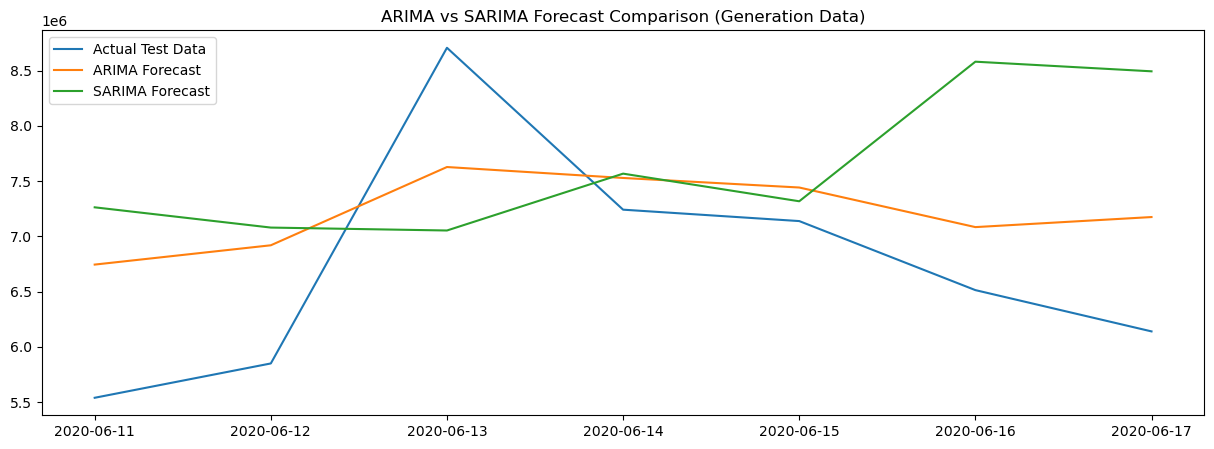

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(test_gen.index, test_gen['DAILY_YIELD'], label='Actual Test Data')
plt.plot(test_gen.index, test_gen['Forecast_ARIMA'], label='ARIMA Forecast')
plt.plot(test_gen.index, test_gen['Forecast_SARIMA'], label='SARIMA Forecast')
plt.legend()
plt.title("ARIMA vs SARIMA Forecast Comparison (Generation Data)")
plt.savefig('first_plot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ARIMA Model

In [42]:
pred_gen=gen_1.copy()
pred_gen=pred_gen.groupby('DATE_TIME').sum()
pred_gen=pred_gen['DAILY_YIELD'][-288:].reset_index()
pred_gen.set_index('DATE_TIME',inplace=True)
pred_gen.head()

DAILY_YIELD
DATE_TIME                         
2020-06-14 23:30:00  155054.000000
2020-06-14 23:45:00  142682.392857
2020-06-15 00:00:00    5480.000000
2020-06-15 00:15:00       0.000000
2020-06-15 00:30:00       0.000000

In [43]:
result = adfuller(pred_gen['DAILY_YIELD'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.289937647479357
p-value : 0.17523382074929789
#Lags Used : 1
Number of Observations Used : 286
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


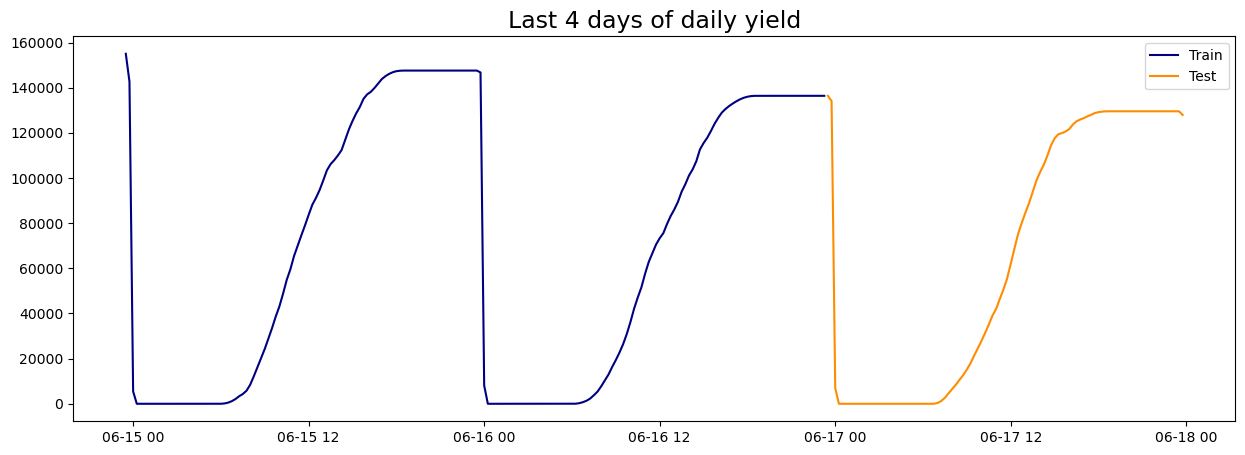

In [44]:
train=pred_gen[:192]
test=pred_gen[-96:]
plt.figure(figsize=(15,5))
plt.plot(train,label='Train',color='navy')
plt.plot(test,label='Test',color='darkorange')
plt.title('Last 4 days of daily yield',fontsize=17)
plt.legend()
plt.show()

In [45]:
arima_model = auto_arima(train,start_p=0,d=1,start_q=0,max_p=4,max_d=4,max_q=4,start_P=0,D=1,start_Q=0,max_P=1,max_D=1,max_Q=1,m=96,seasonal=True,error_action='warn',trace=True,supress_warning=True,stepwise=True,random_state=20,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=1645.555, Time=0.60 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=1539.889, Time=8.03 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=1541.502, Time=15.29 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=1539.528, Time=2.34 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=1539.889, Time=9.36 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=inf, Time=17.57 sec
 ARIMA(2,1,0)(0,1,0)[96]             : AIC=1538.237, Time=2.16 sec
 ARIMA(2,1,0)(1,1,0)[96]             : AIC=1539.552, Time=17.38 sec
 ARIMA(2,1,0)(0,1,1)[96]             : AIC=1539.555, Time=12.72 sec
 ARIMA(2,1,0)(1,1,1)[96]             : AIC=inf, Time=18.67 sec
 ARIMA(3,1,0)(0,1,0)[96]             : AIC=1530.967, Time=4.86 sec
 ARIMA(3,1,0)(1,1,0)[96]             : AIC=1528.008, Time=18.74 sec
 ARIMA(3,1,0)(1,1,1)[96]             : AIC=inf, Time=30.22 sec
 ARIMA(3,1,0)(0,1,1)[96]             : AIC=1527.753, Time=17.98 sec
 ARIMA(4,1,0)(0,1,1)[96]  

In [46]:
future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range(0,2910,15) ]

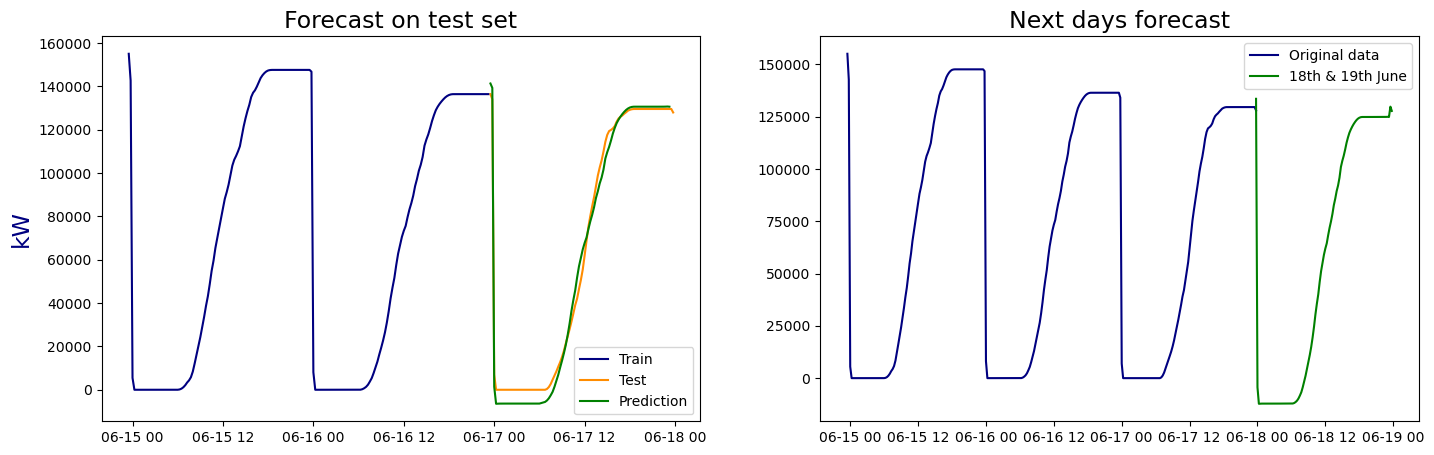

In [47]:
prediction=pd.DataFrame(arima_model.predict(n_periods=96),index=test.index)
prediction.columns=['predicted_yield']

fig,ax= plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
ax[0].plot(train,label='Train',color='navy')
ax[0].plot(test,label='Test',color='darkorange')
ax[0].plot(prediction,label='Prediction',color='green')
ax[0].legend()
ax[0].set_title('Forecast on test set',size=17)
ax[0].set_ylabel('kW',color='navy',fontsize=17)


f_prediction=pd.DataFrame(arima_model.predict(n_periods=194),index=future_dates)
f_prediction.columns=['predicted_yield']
ax[1].plot(pred_gen,label='Original data',color='navy')
ax[1].plot(f_prediction,label='18th & 19th June',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast',size=17)
plt.show()

In [48]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  192
Model:             SARIMAX(4, 1, 0)x(0, 1, [1], 96)   Log Likelihood                -757.647
Date:                              Thu, 06 Mar 2025   AIC                           1527.294
Time:                                      23:06:33   BIC                           1542.617
Sample:                                  06-14-2020   HQIC                          1533.486
                                       - 06-16-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2318      0.025     -9.315      0.000      -0.281      -0.183
ar.L2          0.0985      0.058      1.699      0.089      -0.015       0.212
ar.L3          0.0988      0.041      2.434      0.015       0.019       0.178
ar.L4          0.0265      0.068      0.389      0.697      -0.107       0.160
ma.S.L96      -0.1111      0.053     -2.100      0.036      -0.215      -0.007
sigma2      5.751e+05    6.5e+04      8.852      0.000    4.48e+05    7.02e+05
===================================================================================
Ljung-Box (L1) (Q):                  17.39   Jarque-Bera (JB):                27.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.49   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""